# 发表在science的聚类算法，对其进行复现

## 读取数据，并确认距离矩阵

In [542]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from colors import cnames
%matplotlib inline
import pandas as pd

In [543]:
#data=np.array(Image.open("plane.jpg").convert('L')).astype('int')

In [544]:
#plt.imshow(data)

In [545]:
# map=data[200:300,100:200]
# plt.imshow(map)
# [xs,ys]=np.shape(map)


In [546]:
# node=[]


In [547]:
# for i in range(xs):
#     for j in range(ys):
#         if map[i][j]<128:
#             node.append([i,j])
            

In [548]:
# node

In [549]:
# for k in node:
#     plt.scatter(k[0],k[1])

In [550]:
# node=np.asarray(node)

(array([[-1.00099962e+01,  1.93538273e+00],
        [-9.63822657e+00,  1.75218602e+00],
        [-4.96422533e+00,  1.07500010e+01],
        [-3.07194551e+00,  9.38724114e+00],
        [-5.12607616e+00,  9.42690312e+00],
        [-1.00940809e+01, -6.70384377e-02],
        [ 1.13653855e+00, -1.56370980e+00],
        [-1.03331291e+01,  1.67429636e+00],
        [-5.14100119e+00,  7.24350837e+00],
        [-7.20097356e-01, -2.62417298e+00],
        [-4.71287148e+00,  8.92886727e+00],
        [-1.12866782e+00, -7.63809207e-01],
        [-1.01377166e+01,  1.50524540e+00],
        [-5.44538419e+00,  8.40445674e+00],
        [-1.06118840e+01,  3.46569853e-01],
        [-4.36865245e+00,  8.69570427e+00],
        [-4.64466411e+00,  8.85115776e+00],
        [ 6.33022673e-01, -2.27708806e+00],
        [-4.26641510e+00,  8.29854437e+00],
        [-4.61555259e+00,  1.04429392e+01],
        [-4.29602678e+00,  8.85781472e+00],
        [-8.98851283e+00,  2.73980002e-01],
        [-9.38553747e+00,  1.574

In [551]:
data=pd.read_table(r"Twomoons.txt", header=None, delim_whitespace=True)

In [552]:
x=data[1]
y=data[2]
node=[[x[i],y[i]] for i in range(data.shape[0])]

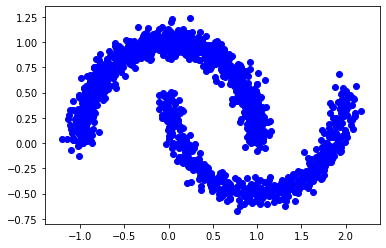

In [553]:
for i in node:
    plt.scatter(i[0],i[1],c='blue')

In [554]:
node=np.array(node)
num=node.shape[0]

In [555]:
num

1502

In [556]:
distance=np.zeros((num,num))

### 利用欧式距离计算距离

In [557]:
for i in range(num):
    for j in range(i+1,num):
        distance[i][j]=distance[j][i]=np.linalg.norm((node[i]-node[j]),ord=2)
        

In [558]:
distance

array([[0.        , 0.15463763, 0.15732822, ..., 1.20270139, 0.99441355,
        1.15510818],
       [0.15463763, 0.        , 0.13607472, ..., 1.05000552, 0.85293743,
        1.01516121],
       [0.15732822, 0.13607472, 0.        , ..., 1.09338292, 0.86139838,
        1.01919936],
       ...,
       [1.20270139, 1.05000552, 1.09338292, ..., 0.        , 0.33020111,
        0.31144581],
       [0.99441355, 0.85293743, 0.86139838, ..., 0.33020111, 0.        ,
        0.16328913],
       [1.15510818, 1.01516121, 1.01919936, ..., 0.31144581, 0.16328913,
        0.        ]])

## 确定dc

In [559]:
dismap=[]
for i in distance:
    for j in i:
        if j>0:
            dismap.append(j)
            

In [560]:
dismap.sort()


In [561]:
dismap


[0.00045363319526828234,
 0.00045363319526828234,
 0.0005998887881553116,
 0.0005998887881553116,
 0.000686951042312015,
 0.000686951042312015,
 0.0007849750665372697,
 0.0007849750665372697,
 0.0010473229215854174,
 0.0010473229215854174,
 0.0015784669248247564,
 0.0015784669248247564,
 0.0017938063602349994,
 0.0017938063602349994,
 0.001878227369015573,
 0.001878227369015573,
 0.00219312904799076,
 0.00219312904799076,
 0.0023544088730172445,
 0.0023544088730172445,
 0.002563085792632151,
 0.002563085792632151,
 0.002636625137307424,
 0.002636625137307424,
 0.002720118482241616,
 0.002720118482241616,
 0.0027240869300662537,
 0.0027240869300662537,
 0.0027834347108132715,
 0.0027834347108132715,
 0.002838509915719621,
 0.002838509915719621,
 0.0029250128066486995,
 0.0029250128066486995,
 0.0029650606924861633,
 0.0029650606924861633,
 0.0030764361762155323,
 0.0030764361762155323,
 0.0031049998345008155,
 0.0031049998345008155,
 0.003182268072323038,
 0.003182268072323038,
 0.00328

In [562]:
num

1502

In [563]:
len(dismap)

2254502

In [564]:
1502*1501

2254502

In [565]:
dc=dismap[int(num*(num-1)*0.03*2)]

In [566]:
dc

0.20714283994520927

## 计算局部密度

###     利用Gaussian kernel计算局部密度

In [567]:
import math 


In [568]:
p=np.zeros(num)

for i in range(num):
    p_num=0
    for j in range(num):
        if i==j:
            continue
        else:
            p_num+=math.exp(-pow((distance[i][j]/dc),2))
    p[i]=p_num
            

In [569]:
p


array([60.19431009, 84.54492236, 49.71642549, ...,  6.32269931,
       29.89594177, 34.90245896])

### 计算距离δi

#### p的降序索引即为q

In [570]:
q=p.argsort()[::-1]

In [571]:
q


array([ 510,  488,  526, ..., 1487, 1490, 1499], dtype=int64)

In [572]:
for i in range(num-1):
    print(p[q[i]]>=p[q[i+1]])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


#### 计算δi(δi度量xi与比其密度高的最近的样本点之间的距离；如果pi为最大值，则δi为与其距离最远样本之间的距离 
并计算ni，ni表示S中所有局部密度（在排序意义)比xi大的数据点中与xi距离最近的数据点的编号）

In [573]:
delta=np.zeros(num)
n=np.zeros(num)
dmax=dismap[-1]

In [574]:
n

array([0., 0., 0., ..., 0., 0., 0.])

In [575]:
for i in range(1,num):
    delta[q[i]]=dmax
      
    #print(delta[q[i]])
    for j in range(i):
       # print(distance[q[i]][q[j]],delta[q[i]])
       # print(distance[q[i]][q[j]]<delta[q[i]])
        if distance[q[i]][q[j]]<delta[q[i]]:
            
            delta[q[i]]=distance[q[i]][q[j]]
            n[q[i]]=q[j]
    
delta[q[0]]=np.amax(delta)

In [576]:
n

array([  53.,   83.,   22., ..., 1487., 1488., 1481.])

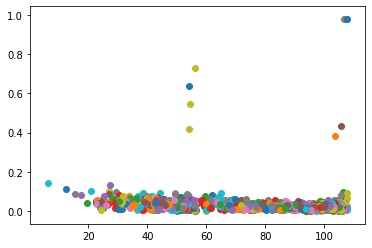

In [577]:
for i in range(num):
    plt.scatter(p[i],delta[i])


In [578]:
gama=np.zeros(num)
delta_max=np.amax(delta)
delta_min=np.amin(delta)
p_max=np.amax(p)
p_min=np.amin(p)
for i in range(num):
    delta[i]=(delta[i]-delta_min)/(delta_max-delta_min)
    p[i]=(p[i]-p_min)/(p_max-p_min)
    gama[i]=delta[i]*p[i]

In [579]:
b = np.argsort(gama)[::-1] 


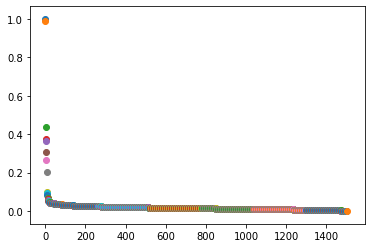

In [580]:
for i in range(num):
    plt.scatter(i,gama[b[i]])

In [581]:
gama[b]


array([1.00000000e+00, 9.88360802e-01, 4.36077140e-01, ...,
       7.32337340e-05, 0.00000000e+00, 0.00000000e+00])

## 确定聚类中心

In [582]:
k=2
m=np.zeros(k)
m=b[:k]

In [583]:
m

array([510, 157], dtype=int64)

In [584]:
gama[m]

array([1.       , 0.9883608])

In [585]:
c=-np.ones(num)

In [586]:
for i in range(k):
    c[m[i]]=i

In [587]:
c

array([-1., -1., -1., ..., -1., -1., -1.])

## 对非聚类中心点进行归类

In [588]:
n=np.int16(n)

In [589]:
n

array([  53,   83,   22, ..., 1487, 1488, 1481], dtype=int16)

In [590]:
for i in range(num):
    if(c[q[i]])==-1:
        c[q[i]]=c[n[q[i]]]

In [591]:
c

array([1., 1., 1., ..., 1., 1., 1.])

## 将聚类中心划分为cluster core与cluster halo

In [592]:
colors=list(cnames.keys())

In [593]:
c

array([1., 1., 1., ..., 1., 1., 1.])

In [594]:
c=np.int8(c)

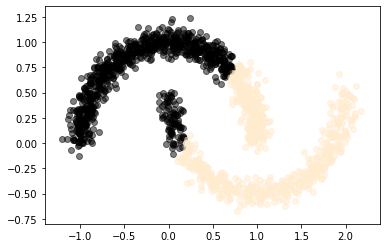

In [595]:
for i in range(num):
    label=c[i]
    color=colors[label%k]
    plt.scatter(node[i][0],node[i][1],c=color,alpha=0.5)
# for i in range(k):
#     plt.scatter(node[m[i]][0],node[m[i]][1],marker='+',c='#000000',s=100)

In [596]:
for i in range(k):
    print(np.sum(c==i))

838
664
